<a href="https://colab.research.google.com/github/asmaa-aljazzar/titanic-eda-site/blob/main/EDA_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
# 1. Install and import required libraries
import pandas as pd
# for style
import seaborn as sns
import matplotlib.pyplot as plt
# to download and upload files
from google.colab import files
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


###rcParams
**runtime configuration parameters** in **Matplotlib**. It’s a **dictionary-like object** that controls the default styles and behavior of plots — like colors, sizes, fonts, line styles, etc.

In [163]:
# Global dark background style
plt.style.use('dark_background')
sns.set_style("darkgrid")

# Global font and size
plt.rcParams.update({
    'axes.edgecolor': 'yellow',        # yellow border around axes
    'axes.labelcolor': 'white',        # white axis labels
    'xtick.color': 'white',            # white x-axis
    'ytick.color': 'white',            # white y-axis
    'text.color': 'white',             # white text
    'axes.facecolor': '#222222',       # plot area background
    'figure.facecolor': '#111111',     # entire figure background
    'savefig.facecolor': '#111111',    # background for saved images
    'savefig.edgecolor': 'yellow',     # edge when saving
})
sns.set_palette(['purple'])

In [164]:

# 2. Load the dataset
df = pd.read_csv("train.csv")

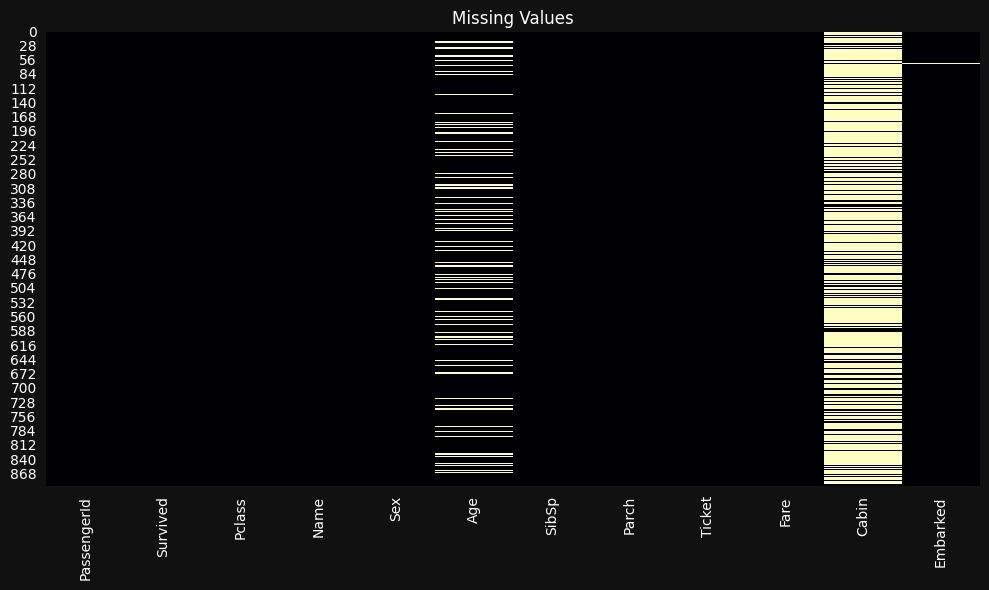

In [165]:
# 6. Missing values heatmap
plt.figure(figsize=(10, 6))
# cmap='magma'	Applies a vivid dark-to-light color palette
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title("Missing Values")
# plt.tight_layout() automatically adjusts the spacing of subplots,
# titles, labels, and axes so that they don’t overlap or get cut off in the figure.
plt.tight_layout()
plt.savefig("missing_values.png")

In [184]:
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  AgeGroup     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Pa

In [167]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna('S', inplace=True)

In [168]:
df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

In [169]:
def age_group(age):
    if age < 12:
        return 'Child'
    elif age < 18:
        return 'Teen'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

In [170]:
df['AgeGroup'] = df['Age'].apply(age_group)

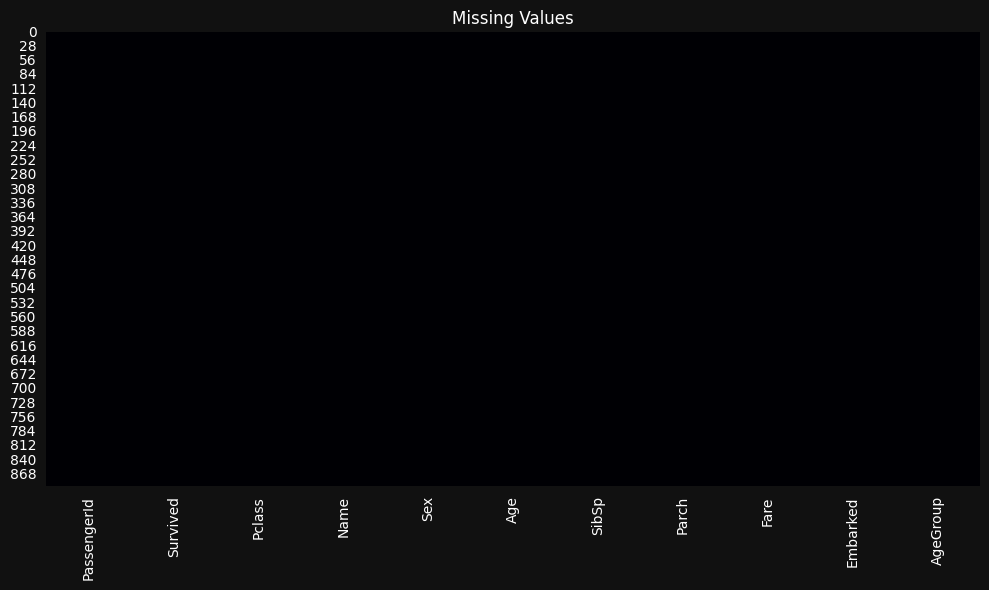

In [171]:
# 6. Missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title("Missing Values")
plt.tight_layout()
plt.savefig("missing_values.png")

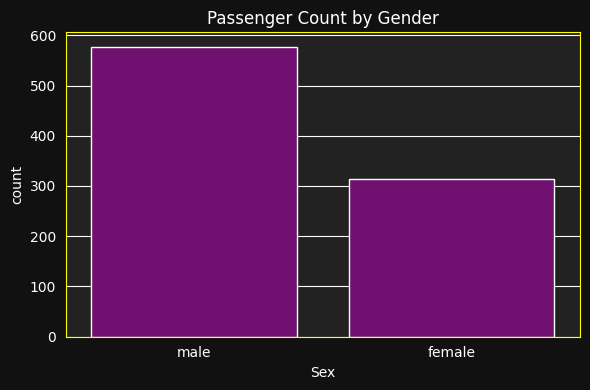

In [172]:
# 7. Survival by Gender (no 'Survived' in test set, so we'll skip this chart if needed)
# Instead, we’ll do passenger count by gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex')
plt.title("Passenger Count by Gender")
plt.tight_layout()
plt.savefig("gender_count.png")
plt.show()

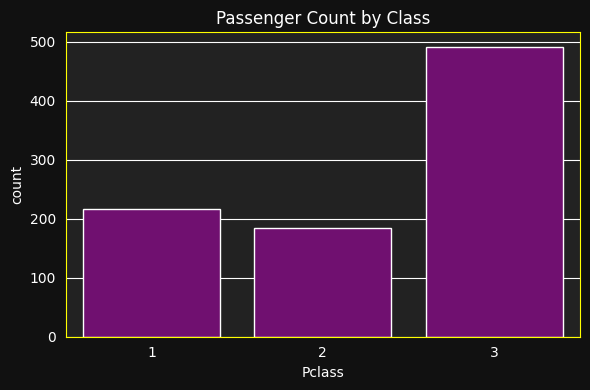

In [173]:

# 8. Passenger class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass')
plt.title("Passenger Count by Class")
plt.tight_layout()
plt.savefig("class_distribution.png")
plt.show()

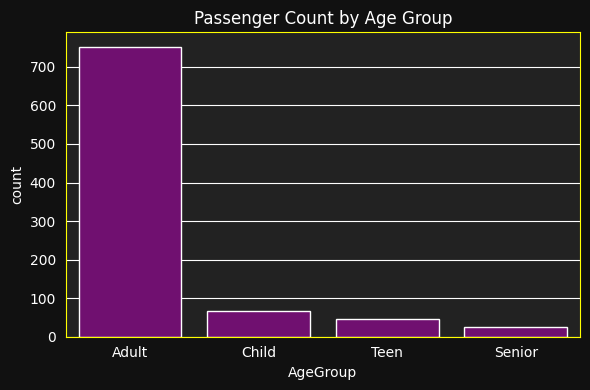

In [174]:
# 9. Age distribution by group
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='AgeGroup')
plt.title("Passenger Count by Age Group")
plt.tight_layout()
plt.savefig("age_groups.png")
plt.show()

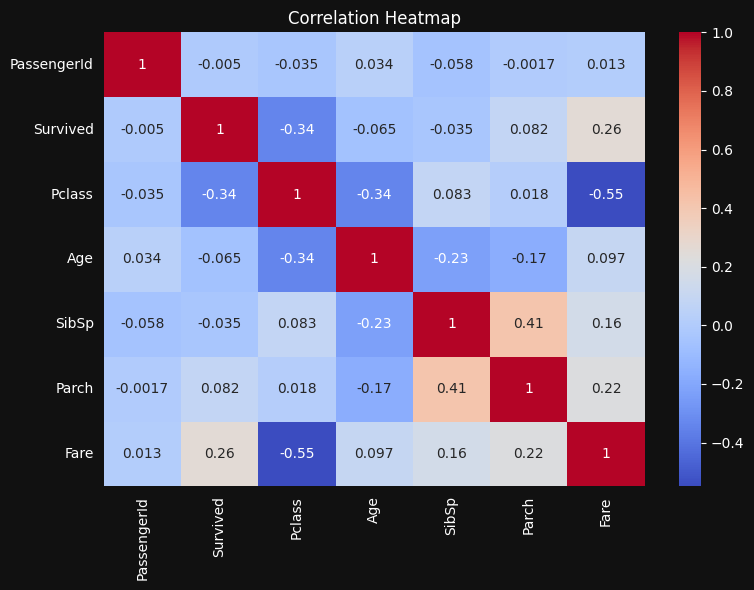

In [175]:
# 10. Correlation heatmap (numerical only)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

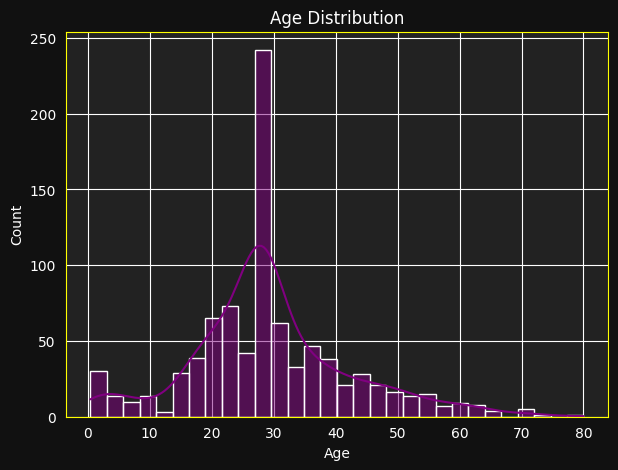

In [176]:
# 1. Histogram of Age
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title("Age Distribution")
plt.savefig("hist_age.png")
plt.show()

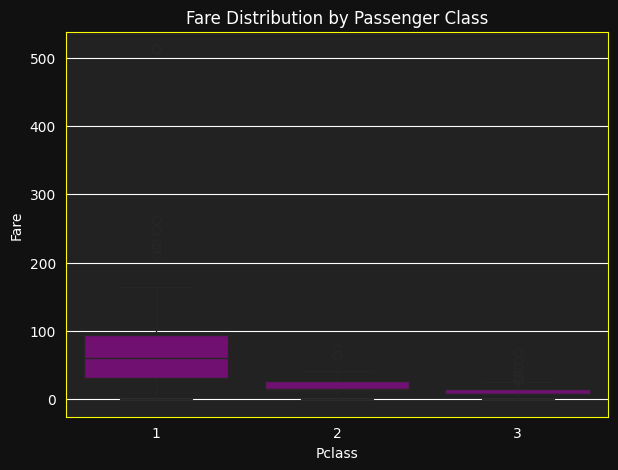

In [177]:
# 2. Boxplot of Fare by Pclass
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title("Fare Distribution by Passenger Class")
plt.savefig("boxplot_fare_pclass.png")
plt.show()

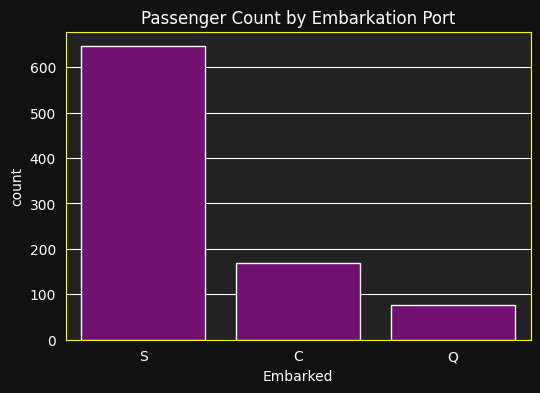

In [178]:
# 3. Countplot of Embarked
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Embarked')
plt.title("Passenger Count by Embarkation Port")
plt.savefig("embarked_count.png")
plt.show()

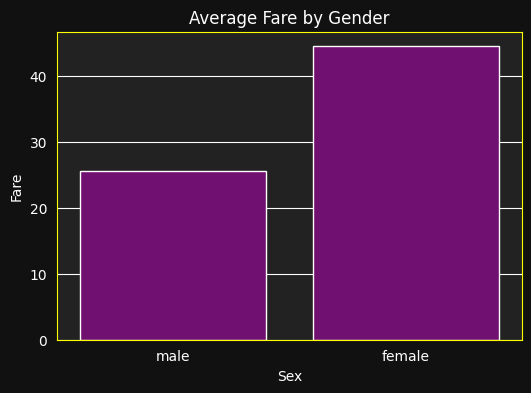

In [179]:
# 4. Barplot: Average Fare by Sex
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Sex', y='Fare', estimator='mean', errorbar=None)
plt.title("Average Fare by Gender")
plt.savefig("bar_fare_by_gender.png")
plt.show()

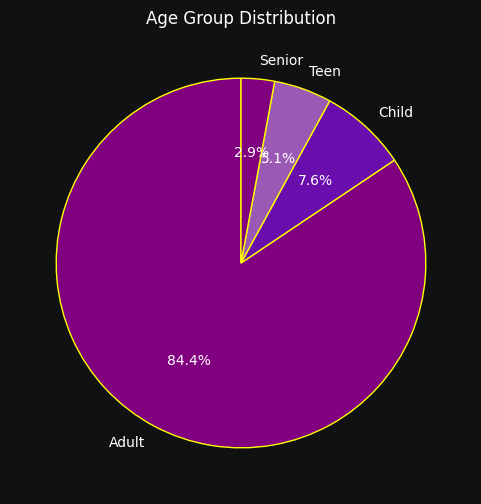

In [180]:
# 5. Pie Chart of Age Groups
plt.figure(figsize=(6, 6))
group_counts = df['AgeGroup'].value_counts()
plt.pie(group_counts, labels=group_counts.index,
        autopct='%1.1f%%', startangle=90,
        colors=['purple', '#6a0dad', '#9b59b6', '#800080'],
        wedgeprops=dict(edgecolor='yellow'))

plt.title("Age Group Distribution")
plt.savefig("pie_age_group.png")
plt.show()

In [181]:
df.to_csv("titanic_cleaned.csv", index=False)
print("\n💾 Saved: titanic_cleaned.csv")


💾 Saved: titanic_cleaned.csv


In [182]:
# 12. Download files for Django website
files.download("titanic_cleaned.csv")
files.download("missing_values.png")
files.download("gender_count.png")
files.download("class_distribution.png")
files.download("age_groups.png")
files.download("correlation_heatmap.png")
files.download("hist_age.png")
files.download("embarked_count.png")
files.download("boxplot_fare_pclass.png")
files.download("bar_fare_by_gender.png")
files.download("pie_age_group.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>